In [1]:
#Import dependencies
import path
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
#Loop thru CSV files for parking violations, and add to DataFrame
parking_list_ = []

parking_path = '/Users/hannah/Desktop/ParkingViolation'
parking_allFiles = glob.glob(parking_path + "/*.csv")

for parking_file_ in parking_allFiles:
    df = pd.read_csv(parking_file_,index_col=None, header=0)
    parking_list_.append(df)

parking_frame = pd.concat(parking_list_, axis = 0, ignore_index = True)

parking_frame.head()

X          Y  OBJECTID  ROWID_  DAY_OF_WEEK  HOLIDAY  WEEK_OF_YEAR  \
0 -77.009498  38.872980   5359102     NaN          NaN      NaN           NaN   
1 -77.033642  38.901937   5359103     NaN          NaN      NaN           NaN   
2 -77.027043  38.918658   5359104     NaN          NaN      NaN           NaN   
3 -77.027043  38.918658   5359105     NaN          NaN      NaN           NaN   
4 -77.038498  38.906106   5359106     NaN          NaN      NaN           NaN   

   MONTH_OF_YEAR  ISSUE_TIME VIOLATION_CODE  \
0            NaN         NaN           P055   
1            NaN         NaN           P039   
2            NaN         NaN           P007   
3            NaN         NaN           P170   
4            NaN         NaN           P025   

                         VIOLATION_DESCRIPTION  \
0                           NO PARKING ANYTIME   
1                        PARK AT EXPIRED METER   
2                           PARK IN A BUS ZONE   
3              FAILURE TO DISPLAY CURRENT TAGS   
4  PARK LESS THAN 40 FEET FROM AN INTERSECTION   

                            LOCATION RP_PLATE_STATE  BODY_STYLE  ADDRESS_ID  \
0       UNIT BLOCK O ST SW EAST SIDE             DC         NaN      803554   
1     900 BLOCK 15TH ST NW WEST SIDE             MD         NaN      800554   
2    2200 BLOCK 11TH ST NW WEST SIDE             MD         NaN      806747   
3    2200 BLOCK 11TH ST NW WEST SIDE             MD         NaN      806747   
4    1200 BLOCK 17TH ST NW WEST SIDE             MO         NaN      800233   

   STREETSEGID  XCOORD  YCOORD         TICKET_ISSUE_DATE  
0       3051.0  399176  133905  2018-11-01T20:20:00.000Z  
1        471.0  397082  137120  2018-11-30T14:16:00.000Z  
2       5785.0  397655  138976  2018-11-30T23:35:00.000Z  
3       5785.0  397655  138976  2018-11-30T23:36:00.000Z  
4        196.0  396661  137583  2018-11-21T15:43:00.000Z

In [3]:
#List column names
parking_frame.columns

Index(['X', 'Y', 'OBJECTID', 'ROWID_', 'DAY_OF_WEEK', 'HOLIDAY',
       'WEEK_OF_YEAR', 'MONTH_OF_YEAR', 'ISSUE_TIME', 'VIOLATION_CODE',
       'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'BODY_STYLE',
       'ADDRESS_ID', 'STREETSEGID', 'XCOORD', 'YCOORD', 'TICKET_ISSUE_DATE'],
      dtype='object')

In [4]:
#Re-create frame with columns of interest
parking_frame = parking_frame[['X', 'Y', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'LOCATION', 'RP_PLATE_STATE', 'TICKET_ISSUE_DATE']]

parking_frame.head()

X          Y VIOLATION_CODE  \
0 -77.009498  38.872980           P055   
1 -77.033642  38.901937           P039   
2 -77.027043  38.918658           P007   
3 -77.027043  38.918658           P170   
4 -77.038498  38.906106           P025   

                         VIOLATION_DESCRIPTION  \
0                           NO PARKING ANYTIME   
1                        PARK AT EXPIRED METER   
2                           PARK IN A BUS ZONE   
3              FAILURE TO DISPLAY CURRENT TAGS   
4  PARK LESS THAN 40 FEET FROM AN INTERSECTION   

                            LOCATION RP_PLATE_STATE         TICKET_ISSUE_DATE  
0       UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z  
1     900 BLOCK 15TH ST NW WEST SIDE             MD  2018-11-30T14:16:00.000Z  
2    2200 BLOCK 11TH ST NW WEST SIDE             MD  2018-11-30T23:35:00.000Z  
3    2200 BLOCK 11TH ST NW WEST SIDE             MD  2018-11-30T23:36:00.000Z  
4    1200 BLOCK 17TH ST NW WEST SIDE             MO  2018-11-21T15:43:00.000Z

In [5]:
#Data type of date column
parking_frame['TICKET_ISSUE_DATE'].dtype

dtype('O')

In [6]:
#Convert date column to datetime format
#parking_frame['TICKET_ISSUE_DATE'] = pd.to_datetime(parking_frame['TICKET_ISSUE_DATE'], format='%Y-%m-%d %H:%M:%S +0000 %Z')

#parking_frame.head()

In [7]:
#Set index to date, and add date column
parking_frame = parking_frame.set_index(pd.DatetimeIndex(parking_frame['TICKET_ISSUE_DATE']))

parking_frame['Date'] = parking_frame.index.date

parking_frame.head()

X          Y VIOLATION_CODE  \
TICKET_ISSUE_DATE                                          
2018-11-01 20:20:00 -77.009498  38.872980           P055   
2018-11-30 14:16:00 -77.033642  38.901937           P039   
2018-11-30 23:35:00 -77.027043  38.918658           P007   
2018-11-30 23:36:00 -77.027043  38.918658           P170   
2018-11-21 15:43:00 -77.038498  38.906106           P025   

                                           VIOLATION_DESCRIPTION  \
TICKET_ISSUE_DATE                                                  
2018-11-01 20:20:00                           NO PARKING ANYTIME   
2018-11-30 14:16:00                        PARK AT EXPIRED METER   
2018-11-30 23:35:00                           PARK IN A BUS ZONE   
2018-11-30 23:36:00              FAILURE TO DISPLAY CURRENT TAGS   
2018-11-21 15:43:00  PARK LESS THAN 40 FEET FROM AN INTERSECTION   

                                              LOCATION RP_PLATE_STATE  \
TICKET_ISSUE_DATE                                                       
2018-11-01 20:20:00       UNIT BLOCK O ST SW EAST SIDE             DC   
2018-11-30 14:16:00     900 BLOCK 15TH ST NW WEST SIDE             MD   
2018-11-30 23:35:00    2200 BLOCK 11TH ST NW WEST SIDE             MD   
2018-11-30 23:36:00    2200 BLOCK 11TH ST NW WEST SIDE             MD   
2018-11-21 15:43:00    1200 BLOCK 17TH ST NW WEST SIDE             MO   

                            TICKET_ISSUE_DATE        Date  
TICKET_ISSUE_DATE                                          
2018-11-01 20:20:00  2018-11-01T20:20:00.000Z  2018-11-01  
2018-11-30 14:16:00  2018-11-30T14:16:00.000Z  2018-11-30  
2018-11-30 23:35:00  2018-11-30T23:35:00.000Z  2018-11-30  
2018-11-30 23:36:00  2018-11-30T23:36:00.000Z  2018-11-30  
2018-11-21 15:43:00  2018-11-21T15:43:00.000Z  2018-11-21

In [8]:
#Import weather CSV

file = '/Users/hannah/Desktop/WeatherData.csv' #change to relative path!

weather_frame = pd.read_csv(file, index_col=0, parse_dates=True)

weather_frame = weather_frame.dropna(axis=1, how='any')

weather_frame = weather_frame.groupby(weather_frame['dt_iso']).first()

weather_frame.reset_index(inplace=True)

weather_frame.head()

dt_iso  city_id    temp  temp_min  temp_max  \
0  2018-01-01 00:00:00 +0000 UTC  4366164  265.32    263.15    267.15   
1  2018-01-01 01:00:00 +0000 UTC  4366164  264.10    261.15    266.15   
2  2018-01-01 02:00:00 +0000 UTC  4366164  263.82    261.15    266.15   
3  2018-01-01 03:00:00 +0000 UTC  4366164  263.38    260.15    265.15   
4  2018-01-01 04:00:00 +0000 UTC  4366164  263.20    260.15    265.15   

   pressure  humidity  wind_speed  wind_deg  clouds_all  weather_id  \
0      1029        48           2       240           1         800   
1      1029        52           2       230           1         800   
2      1030        52           3       230           1         800   
3      1030        52           2       230           1         800   
4      1030        52           1       230           1         800   

  weather_main weather_description weather_icon  
0        Clear        sky is clear          01n  
1        Clear        sky is clear          01n  
2        Clear        sky is clear          01n  
3        Clear        sky is clear          01n  
4        Clear        sky is clear          01n

In [9]:
#Convert UTC time to datetime format
weather_frame['dt_iso'] = pd.to_datetime(weather_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 %Z')

#Re-create frame with columns of interest
weather_frame = weather_frame[['dt_iso', 'temp','weather_id', 'weather_main']]

#Create new column for precipitation
weather_frame['precipitation'] = weather_frame['weather_id']
weather_frame['precipitation'] = weather_frame['precipitation'].astype(float)

weather_frame.head()

dt_iso    temp  weather_id weather_main  precipitation
0 2018-01-01 00:00:00  265.32         800        Clear          800.0
1 2018-01-01 01:00:00  264.10         800        Clear          800.0
2 2018-01-01 02:00:00  263.82         800        Clear          800.0
3 2018-01-01 03:00:00  263.38         800        Clear          800.0
4 2018-01-01 04:00:00  263.20         800        Clear          800.0

In [10]:
#Convert precipitation codes to numerical values - information from Open Weather e-mail

for i,row in weather_frame.iterrows():
    if row['weather_id'] == 500:
        weather_frame.at[i,'precipitation'] = 0.5
    elif row['weather_id'] == 501:
        weather_frame.at[i, 'precipitation'] = 1.5
    elif row['weather_id'] == 502:
        weather_frame.at[i, 'precipitation'] = 10
    elif row['weather_id'] == 503:
        weather_frame.at[i, 'precipitation'] = 33
    elif row['weather_id'] == 504:
        weather_frame.at[i, 'precipitation'] = 50
    elif row['weather_id'] == 600:
        weather_frame.at[i, 'precipitation'] = 0.5
    elif row['weather_id'] == 601:
        weather_frame.at[i, 'precipitation'] = 2.75
    elif row['weather_id'] == 602:
        weather_frame.at[i, 'precipitation'] = 5
    else:
        weather_frame.at[i, 'precipitation'] = 0

weather_frame.head()

dt_iso    temp  weather_id weather_main  precipitation
0 2018-01-01 00:00:00  265.32         800        Clear            0.0
1 2018-01-01 01:00:00  264.10         800        Clear            0.0
2 2018-01-01 02:00:00  263.82         800        Clear            0.0
3 2018-01-01 03:00:00  263.38         800        Clear            0.0
4 2018-01-01 04:00:00  263.20         800        Clear            0.0

In [11]:
#Set index to date, and add date column
weather_frame = weather_frame.set_index(pd.DatetimeIndex(weather_frame['dt_iso']))

weather_frame['Date'] = weather_frame.index.date

weather_frame.head()

dt_iso    temp  weather_id weather_main  \
dt_iso                                                                     
2018-01-01 00:00:00 2018-01-01 00:00:00  265.32         800        Clear   
2018-01-01 01:00:00 2018-01-01 01:00:00  264.10         800        Clear   
2018-01-01 02:00:00 2018-01-01 02:00:00  263.82         800        Clear   
2018-01-01 03:00:00 2018-01-01 03:00:00  263.38         800        Clear   
2018-01-01 04:00:00 2018-01-01 04:00:00  263.20         800        Clear   

                     precipitation        Date  
dt_iso                                          
2018-01-01 00:00:00            0.0  2018-01-01  
2018-01-01 01:00:00            0.0  2018-01-01  
2018-01-01 02:00:00            0.0  2018-01-01  
2018-01-01 03:00:00            0.0  2018-01-01  
2018-01-01 04:00:00            0.0  2018-01-01

In [13]:
#Merge parking DF and weather DF

parking_weather_df = pd.merge(parking_frame, weather_frame, on='Date', how='left')
parking_weather_df.head()
print(len(parking_weather_df))

32663871


In [14]:
#Create new DataFrame with date, precipitation and count for parking and moving violations
precip_date = weather_frame.groupby('Date')['precipitation'].sum()
parking_date = parking_frame.groupby('Date')['VIOLATION_CODE'].count()
parking_moving_weather_df = pd.DataFrame({'Daily Precipitation': precip_date, 'Total Parking Violations': parking_date})
parking_moving_weather_df.reset_index()
parking_moving_weather_df.head()

Daily Precipitation  Total Parking Violations
Date                                                     
2018-01-01                 0.00                       124
2018-01-02                 0.50                      2374
2018-01-03                 0.00                      3864
2018-01-04                15.25                      2069
2018-01-05                 0.00                      2452

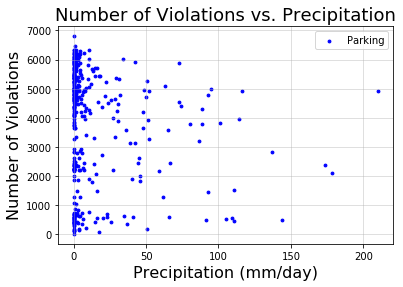

In [15]:
#Create scatter plot to show relationship between precipitation, parking and moving violations
parking_precip_plt = plt.scatter(precip_date, parking_date, color = 'blue', s = 8, label = 'Parking')

plt.title('Number of Violations vs. Precipitation', fontsize = 18)
plt.xlabel('Precipitation (mm/day)', fontsize = 16)
plt.ylabel('Number of Violations', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})

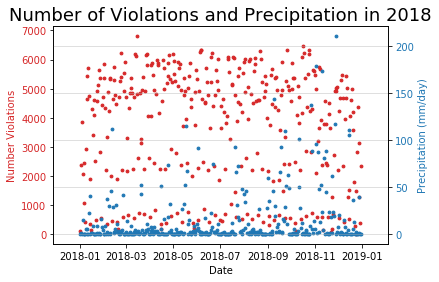

In [16]:
#Create plot to display violations and precipitation over 2018
x_axis = parking_moving_weather_df.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number Violations', color=color)
ax1.scatter(x_axis, parking_moving_weather_df['Total Parking Violations'], color=color, s = 8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm/day)', color=color)  # we already handled the x-label with ax1
ax2.scatter(x_axis, parking_moving_weather_df['Daily Precipitation'], color=color, s = 8)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Violations and Precipitation in 2018', fontsize = 18)
plt.xlabel('Date', fontsize = 16)
plt.grid(alpha = 0.5)

plt.show()

In [22]:
#Prepare to load Data Frames with SQLAlchemy
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

# AWS Database Info - Put in Config file!
remote_db_endpoint = ''
remote_db_port = ''
remote_gwsis_dbname = ''
remote_gwsis_dbuser = ''
remote_gwsis_dbpwd = ''

# local Database Info - Put in Config file
local_parkingmoving_dbname = 'parkingmovingdc'
local_parkingmoving_dbuser = 'root'
local_parkingmoving_dbpwd = ''

In [23]:
# Create Engine and Pass in MySQL Connection
# Local Connection Backup 
lengine = create_engine(f"mysql://{local_parkingmoving_dbuser}@localhost:3306/{local_parkingmoving_dbname}")

In [24]:
# Create a local database engine connection
lconn = lengine.connect()

In [20]:
# Load data to local database
parking_weather_df.to_sql(name='parking_weather', if_exists='append', con=lconn, chunksize=500000, index=False)

In [25]:
#Confirm data loaded to local database
parking_weather_data = pd.read_sql("SELECT * FROM parking_weather", lconn)
print(len(parking_weather_data))
parking_weather_data.head()

32663871


X         Y VIOLATION_CODE VIOLATION_DESCRIPTION  \
0 -77.009498  38.87298           P055    NO PARKING ANYTIME   
1 -77.009498  38.87298           P055    NO PARKING ANYTIME   
2 -77.009498  38.87298           P055    NO PARKING ANYTIME   
3 -77.009498  38.87298           P055    NO PARKING ANYTIME   
4 -77.009498  38.87298           P055    NO PARKING ANYTIME   

                        LOCATION RP_PLATE_STATE         TICKET_ISSUE_DATE  \
0   UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z   
1   UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z   
2   UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z   
3   UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z   
4   UNIT BLOCK O ST SW EAST SIDE             DC  2018-11-01T20:20:00.000Z   

         Date              dt_iso    temp  weather_id weather_main  \
0  2018-11-01 2018-11-01 00:00:00  289.03         800        Clear   
1  2018-11-01 2018-11-01 01:00:00  289.19         800        Clear   
2  2018-11-01 2018-11-01 02:00:00  288.97         800        Clear   
3  2018-11-01 2018-11-01 03:00:00  289.14         800        Clear   
4  2018-11-01 2018-11-01 04:00:00  288.70         800        Clear   

   precipitation  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [ ]:
# AWS Database Connection
engine = create_engine(f"mysql://{remote_gwsis_dbuser}:{remote_gwsis_dbpwd}@{remote_db_endpoint}:{remote_db_port}/{remote_gwsis_dbname}")